In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

The first step is to load the dataset and have a general overview of the dataset

In [4]:
# Loading the dataset 
weather_df = pd.read_csv("../Datasets/1. Weather Data.csv")
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 1. Data Overview and Cleaning 
___ 
At this stage, we shall;
- Look at the key characteristics of the dataset (E.g., No. of records, features, and datatypes).
- Identify and handle any missing and null values.
- Check for and any duplicate records.

In [5]:
# Getting the No. of records in the dataset 
len(weather_df)

8784

In [6]:
# Looking at the features in the dataset 
weather_df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
# Looking at the different datatypes in the dataset 
weather_df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
# Looking at the shape of the dataset
weather_df.shape 

(8784, 8)

The dataset has;

- 8,784 Rows 

- 8 Columns

In [9]:
# Identifying missing of NULL values in the dataset 
weather_df.isnull().any()

Date/Time           False
Temp_C              False
Dew Point Temp_C    False
Rel Hum_%           False
Wind Speed_km/h     False
Visibility_km       False
Press_kPa           False
Weather             False
dtype: bool

- The dataset does not have any missing or null values

In [16]:
# Checking for duplicate ROWS

num_duplicates = weather_df.duplicated().sum()

print("Number of duplicate ROWS: {}".format(num_duplicates))


Number of duplicate ROWS: 0


- There are no duplicates in the dataset

### 2. Statistical Summary
___ 
- Provide statistical summary of dataset (mean, median, std) for numeric features 
- Identify and describe any significant outliers in the dataset

In [17]:
# Summary Statistics 

weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<Axes: >

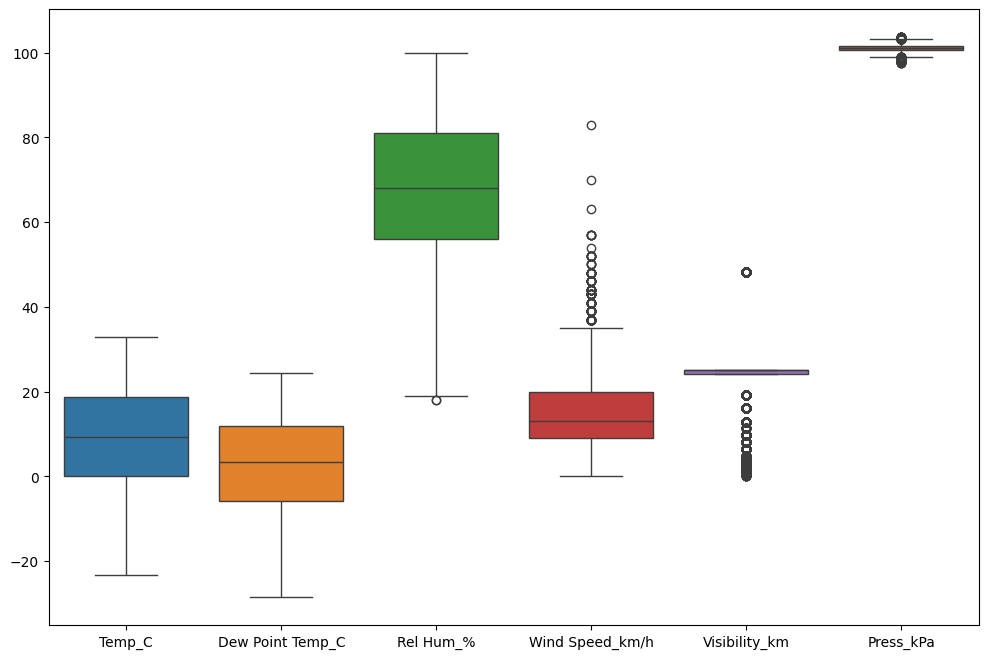

In [28]:
# Discovering outliers in the dataset using Boxplots 
plt.figure(figsize=(12,8))

sns.boxplot(data=weather_df)

- From the Boxplots, we can see that only two columns (Wind Speed_km/h, Visibility) tend to have outliers.

- We shall address these outliers as follows

A. Using IQR to identify and address the outliers "Wind Speed_km/h" column

In [60]:
# Using IQR to identify and address the outliers "Wind Speed_km/h" column

Q1 = weather_df["Wind Speed_km/h"].quantile(0.25) # Lower quartile 
Q3 = weather_df["Wind Speed_km/h"].quantile(0.75) # Upper quartile 

# Inter Quartile Range
IQR = Q3 - Q1

# finding the lower and upper bounds for outliers 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5

# Removing the outliers 
cleaned_weather_df = weather_df[(weather_df["Wind Speed_km/h"] >= lower_bound) & (weather_df["Wind Speed_km/h"] <= upper_bound)]

(8622, 8)

B. Using IQR to identify and address the outliers "Visibility_km" column

In [65]:
Q1 = cleaned_weather_df.Visibility_km.quantile(0.25) # Lower Quartile 
Q3 = cleaned_weather_df.Visibility_km.quantile(0.75) # Upper Quartile 

# Getting IQR 
IQR = Q3 - Q1 

# Upper and lower bounds 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5 

# Removing the outliers for this column 
cleaned_weather_df = cleaned_weather_df[(cleaned_weather_df.Visibility_km >= lower_bound) & (cleaned_weather_df.Visibility_km <= upper_bound)]

(5150, 8)

C. Removing outliers for the 'Rel Hum_%' column

In [77]:
Q1 = cleaned_weather_df["Rel Hum_%"].quantile(0.25) # Lower Quartile 
Q3 = cleaned_weather_df["Rel Hum_%"].quantile(0.75) # Upper Quartile 

# Getting IQR 
IQR = Q3 - Q1 

# Upper and lower bounds 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5 

# Removing the outliers for this column 
cleaned_weather_df = cleaned_weather_df[(cleaned_weather_df["Rel Hum_%"] >= lower_bound) & (cleaned_weather_df["Rel Hum_%"] <= upper_bound)]

D. Removing outliers for the 'Press_kPa' column

In [82]:
Q1 = cleaned_weather_df["Press_kPa"].quantile(0.25) # Lower Quartile 
Q3 = cleaned_weather_df["Press_kPa"].quantile(0.75) # Upper Quartile 

# Getting IQR 
IQR = Q3 - Q1 

# Upper and lower bounds 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5 

# Removing the outliers for this column 
cleaned_weather_df = cleaned_weather_df[(cleaned_weather_df["Press_kPa"] >= lower_bound) & (cleaned_weather_df["Press_kPa"] <= upper_bound)]

<Axes: >

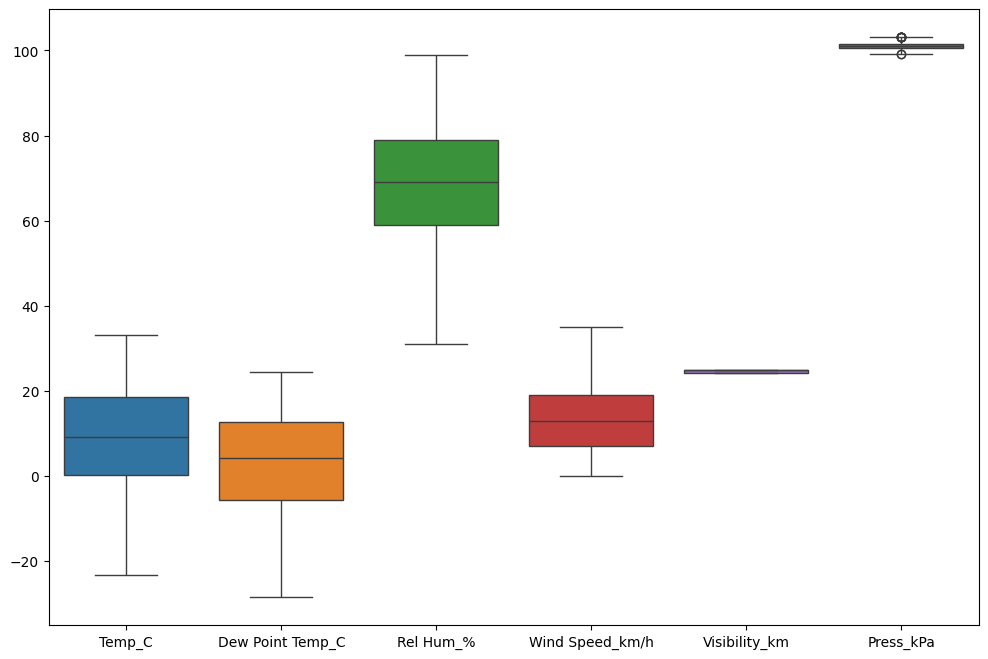

In [87]:
# Confirming that dataset were removed from the dataset 
plt.figure(figsize=(12,8))
sns.boxplot(data=cleaned_weather_df)

- All the outliers have been removed from the dataset

### 3. Data Visualization
___ 
- Visualization to show the distribution of key weather parameters 
- Time series graph showing trends over time 
- Correlation matrices and heatmaps to show relationships between different weather parameters

A. Distribution of key weather parameters, that is, Temperature, Humidity, and Wind Speed.

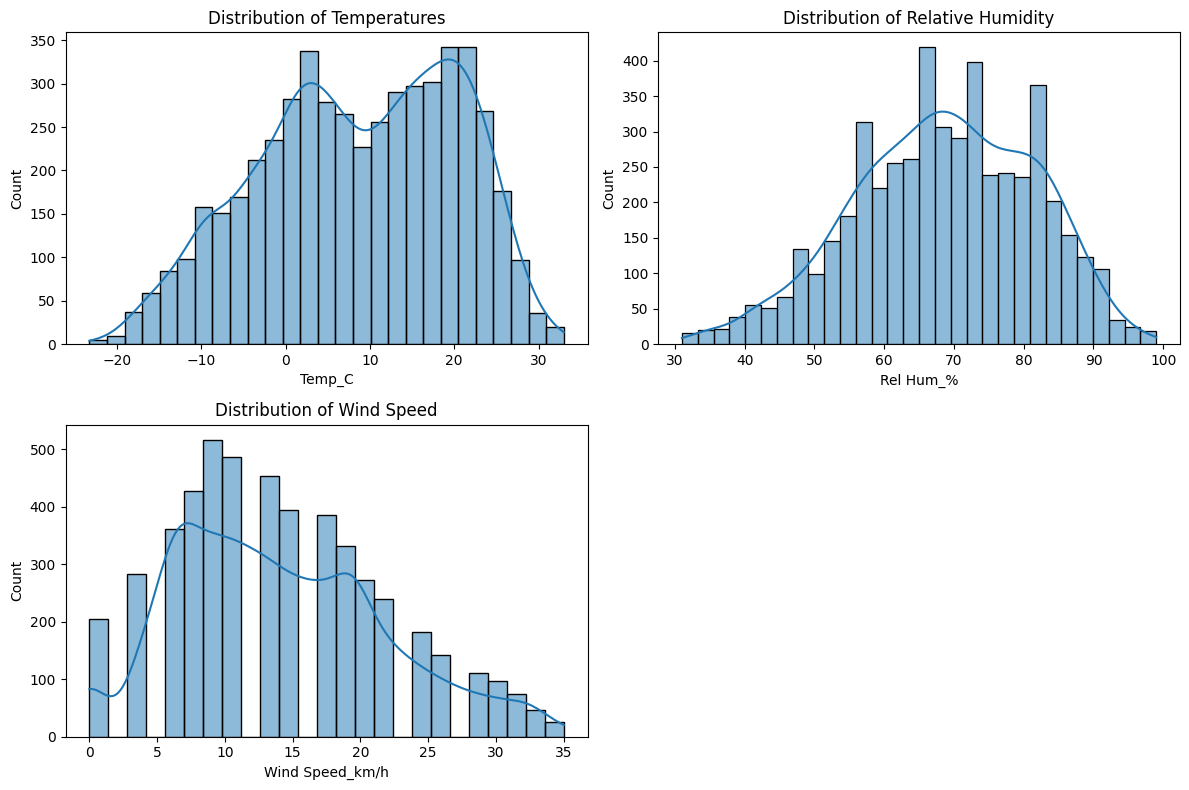

In [129]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

# Distribution of Temperatures 
sns.histplot(data=cleaned_weather_df, x="Temp_C", kde=True, ax=ax[0, 0])
ax[0,0].set_title("Distribution of Temperatures")

# Distribution of Humidity 
sns.histplot(data=cleaned_weather_df, x="Rel Hum_%", kde=True, ax=ax[0, 1])
ax[0, 1].set_title("Distribution of Relative Humidity")

# Distribution of Wind Speed 
sns.histplot(data=cleaned_weather_df, x="Wind Speed_km/h", kde=True, ax=ax[1, 0])
ax[1, 0].set_title("Distribution of Wind Speed") 

# Remove unused grid 
ax[1, 1].set_visible(False)

plt.tight_layout()

#### B. Time Series graph illustrating trends of weather parameters over time

In [134]:
cleaned_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5035 entries, 20 to 8766
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         5035 non-null   object 
 1   Temp_C            5035 non-null   float64
 2   Dew Point Temp_C  5035 non-null   float64
 3   Rel Hum_%         5035 non-null   int64  
 4   Wind Speed_km/h   5035 non-null   int64  
 5   Visibility_km     5035 non-null   float64
 6   Press_kPa         5035 non-null   float64
 7   Weather           5035 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 354.0+ KB


In [160]:
# Since the Date/Time column is not in datetime datatype,
# we shall transform it accordingly as below

cleaned_weather_df["Date/Time"] = pd.to_datetime(cleaned_weather_df["Date/Time"])

cleaned_weather_df.info() # To confirm transformation

<class 'pandas.core.frame.DataFrame'>
Index: 5035 entries, 20 to 8766
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         5035 non-null   datetime64[ns]
 1   Temp_C            5035 non-null   float64       
 2   Dew Point Temp_C  5035 non-null   float64       
 3   Rel Hum_%         5035 non-null   int64         
 4   Wind Speed_km/h   5035 non-null   int64         
 5   Visibility_km     5035 non-null   float64       
 6   Press_kPa         5035 non-null   float64       
 7   Weather           5035 non-null   object        
 8   month             5035 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 393.4+ KB


- The above plot shows how temperature varies over time. 
- There's however, a challenge understanding the x axis and so we shall use month name to increase readability.

In [161]:
# Creating a new column named "month" with actual names of each month
cleaned_weather_df["month"] = cleaned_weather_df["Date/Time"].dt.strftime("%b") 

cleaned_weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month
20,2012-01-01 20:00:00,3.2,1.3,87,19,25.0,99.50,Cloudy,Jan
21,2012-01-01 21:00:00,4.0,1.7,85,20,25.0,99.39,Cloudy,Jan
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy,Jan
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,Jan
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy,Jan


Text(0, 0.5, 'Speed (KM/HR)')

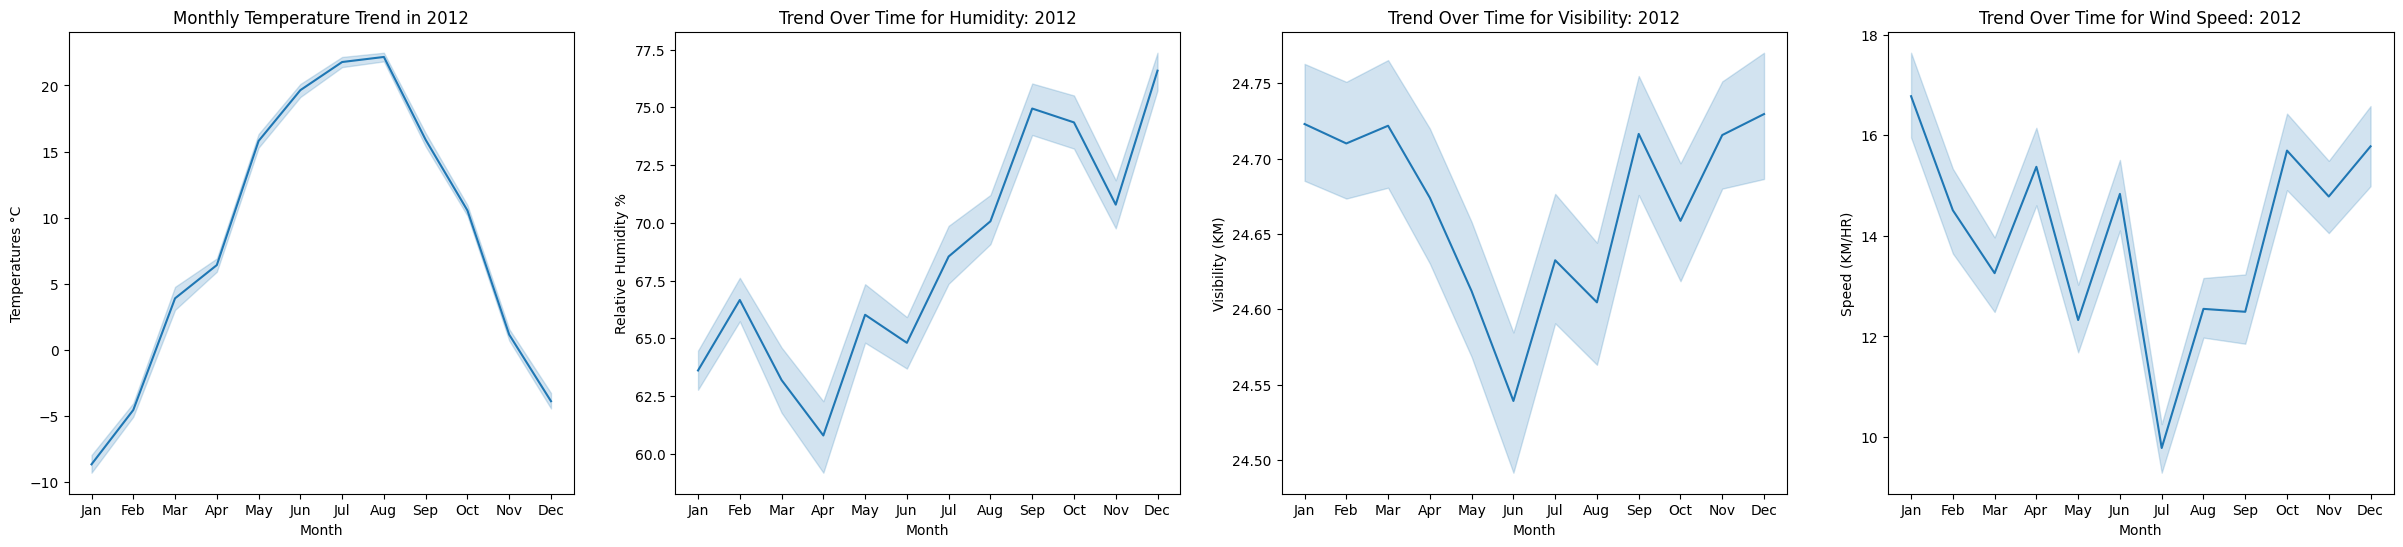

In [184]:
fig, ax = plt.subplots(1, 4, figsize=(30, 6))

# Trendline for Temperature 
sns.lineplot(data=cleaned_weather_df, x="month", y="Temp_C", ax=ax[0])
ax[0].set_title("Monthly Temperature Trend in 2012")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Temperatures °C")

# Trendline for Relative Humidity 
sns.lineplot(data=cleaned_weather_df, x="month", y="Rel Hum_%", ax=ax[1])
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Relative Humidity %")
ax[1].set_title("Trend Over Time for Humidity: 2012")

# Trend line for visibility condition 
sns.lineplot(data=cleaned_weather_df, x="month", y="Visibility_km", ax=ax[2])
ax[2].set_title("Trend Over Time for Visibility: 2012")
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Visibility (KM)")

# Trend line for Wind Speed 
sns.lineplot(data=cleaned_weather_df, x="month", y="Wind Speed_km/h", ax=ax[3])
ax[3].set_title("Trend Over Time for Wind Speed: 2012")
ax[3].set_xlabel("Month")
ax[3].set_ylabel("Speed (KM/HR)")

The above plot illustrates trend and seasonality of different weather conditions.

*Temperatures*
- Jan - Apr: The plot reports extremely low temperatures. During this period, winter is at peak hence explaining low temperatures.
- Temperatures rises through to Jul/Aug indicating the progression from winter to summer. highest temperatures are also in Aug, before they start to decline through to Dec welcoming fall and winter seasons.

*Humidity* - Low humidity levels are experienced early in the year and higher humidity levels experienced later in the year.